In [221]:
import numpy as np
import pandas as pd
import os

In [222]:
data = 'Data/vehicles.csv'

In [223]:
df = pd.read_csv(data, low_memory=False)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [224]:
for col in df.columns:
    print(col)

id
url
region
region_url
price
year
manufacturer
model
condition
cylinders
fuel
odometer
title_status
transmission
VIN
drive
size
type
paint_color
image_url
description
county
state
lat
long
posting_date


In [ ]:
# count the number of missing values in each column
df.isnull().sum()

In [ ]:
# count the number of missing values in each column
df.isnull().sum()

In [ ]:
df.info()

In [227]:
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size'], axis=1, inplace=True)

In [ ]:
# return unique values in region column
df['year'].unique()

In [176]:
df['Age'] = 2023 - df['year']

In [177]:
df.shape

(426880, 16)

In [180]:
# df = df.dropna(subset=['year', 'odometer'])

In [225]:
df.shape

(426880, 26)

In [228]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [229]:
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [230]:
df['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [231]:
df['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [232]:
region = df['region'].value_counts()

In [233]:
df['region']

0                       prescott
1                   fayetteville
2                   florida keys
3         worcester / central MA
4                     greensboro
                   ...          
426875                   wyoming
426876                   wyoming
426877                   wyoming
426878                   wyoming
426879                   wyoming
Name: region, Length: 426880, dtype: object

In [257]:
df['region'] = df['region'].apply(lambda s: s if str(s) in region[:50] else 'others')

In [234]:
mf = df['manufacturer'].value_counts()

In [256]:
df['manufacturer'] = df['manufacturer'].apply(lambda s: s if str(s) in mf[:20] else 'others')

In [ ]:
df['manufacturer'].value_counts()

In [236]:
mf.unique()

array([70985, 55064, 34202, 21269, 19067, 19014, 18342, 16785, 14699,
       13707, 11817, 10338,  9495,  9345,  8457,  8200,  7573,  6953,
        6031,  5978,  5501,  5427,  4802,  4220,  3374,  3292,  2376,
        2288,  2113,  1946,  1384,  1184,  1090,   897,   868,   792,
         153,    95,    63,    24,    21,     3])

In [237]:
model = df['model'].value_counts()

In [238]:
model

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

In [239]:
df['model'] = df['model'].apply(lambda s: s if str(s) in model[:50] else 'others')

In [ ]:
for value in df['model'].unique():
    print (value)

In [241]:
for col in df.columns:
    print (col, len(df[col].value_counts().index))

region 404
price 15655
year 114
manufacturer 42
model 51
condition 6
cylinders 8
fuel 5
odometer 104870
title_status 6
transmission 3
drive 3
type 13
paint_color 12
state 51


In [242]:
# save to csv

df.to_csv('Data/data_t.csv', index=False)

In [243]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [258]:
df = df.dropna(subset=['year', 'odometer'])

### Outliers

In [259]:
df['price'].value_counts()

0        30759
6995      3153
7995      3119
9995      2847
8995      2826
         ...  
14739        1
31721        1
3496         1
3896         1
17873        1
Name: price, Length: 15508, dtype: int64

In [260]:
rr=sorted(df["price"])

In [261]:
quantile1, quantile3= np.percentile(rr,[10,90])
print(quantile1, quantile3)

700.0 37500.0


In [263]:
# drop outliers using price
df=df[(df.price < 37500) & (df.price >= 700 )]
df.shape

(337079, 15)

In [244]:
df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [245]:
# remove text from cylinders column
df['cylinders'] = df['cylinders'].str.extract('(\d+)').astype(float)

In [246]:
df['cylinders'].value_counts()

6.0     94169
4.0     77642
8.0     72062
5.0      1712
10.0     1455
3.0       655
12.0      209
Name: cylinders, dtype: int64

In [247]:
df['fuel'].value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [248]:
df['odometer'].value_counts()

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
149468.0       1
154259.0       1
111887.0       1
213826.0       1
26892.0        1
Name: odometer, Length: 104870, dtype: int64

In [268]:
df["odometer"].isna().sum()

0

In [269]:
df["odometer"].sort_values(ascending=False).head(10)

151740    10000000.0
28738     10000000.0
413267    10000000.0
260971    10000000.0
67001     10000000.0
292399    10000000.0
305172    10000000.0
172766    10000000.0
208157    10000000.0
340694    10000000.0
Name: odometer, dtype: float64

<Axes: xlabel='odometer', ylabel='price'>

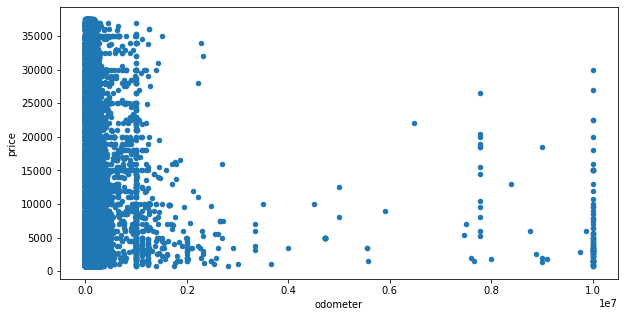

In [270]:
# scatter plot of odometer
df.plot.scatter(x='odometer', y='price', figsize=(10,5))

In [271]:
df['odometer'].describe()

count    3.370790e+05
mean     1.049950e+05
std      1.973294e+05
min      0.000000e+00
25%      4.627500e+04
50%      9.576800e+04
75%      1.412155e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [272]:
df.drop(df[df["odometer"]>=64809218.0].index,inplace=True)
df.drop(df[df["odometer"]==0.0].index,inplace=True)

<Axes: xlabel='odometer', ylabel='price'>

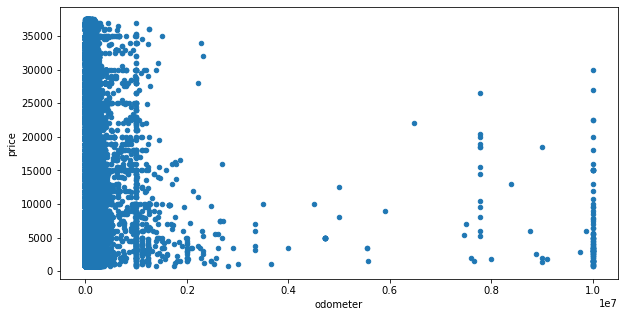

In [273]:
df.plot.scatter(x='odometer', y='price', figsize=(10,5))

`In reality, values for odometer above 300K Miles can be considered as outliers. 
We will remove these values from the dataset.`

In [275]:
# remove outliers
df=df[(df.odometer < 3000000)]

In [276]:
df['odometer'].isna().sum()

0

<Axes: xlabel='odometer', ylabel='price'>

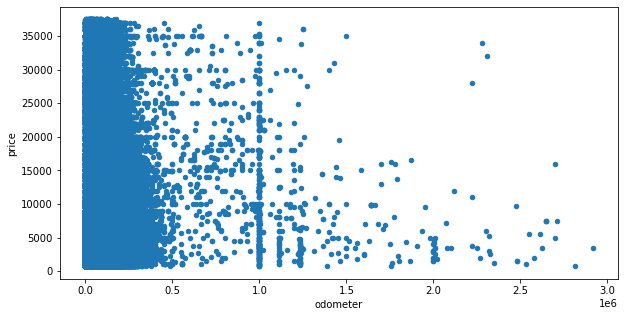

In [278]:
df.plot.scatter(x='odometer', y='price', figsize=(10,5))

In [277]:
df.shape

(335984, 15)

In [210]:
for col in df.columns:
    print (col, len(df[col].value_counts().index))

region 404
price 15476
year 111
manufacturer 42
model 51
condition 6
cylinders 7
fuel 5
odometer 103448
title_status 6
transmission 3
drive 3
type 13
paint_color 12
state 51
Age 111


##### Year Column

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

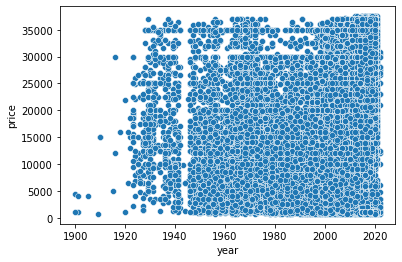

In [281]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [282]:
# remove outliers take year > 1940
df=df[(df.year > 1940)]

### Missing Values

In [211]:
df['title_status'].value_counts()

clean         397542
rebuilt         7075
salvage         3797
lien            1407
missing          753
parts only       174
Name: title_status, dtype: int64

In [213]:
df['transmission'].value_counts()

automatic    329944
other         62552
manual        23932
Name: transmission, dtype: int64

In [214]:
df['drive'].value_counts()

4wd    129594
fwd    103724
rwd     57467
Name: drive, dtype: int64

In [215]:
# age 
df['Age'].describe()

count    418100.000000
mean         11.696228
std           9.358994
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max         123.000000
Name: Age, dtype: float64

In [284]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,13561400,40.433
condition,12157900,36.249
drive,10286700,30.670
paint_color,9629600,28.711
type,7335400,21.871
title_status,546200,1.628
fuel,193200,0.576
transmission,128800,0.384
region,0,0.000
price,0,0.000


# Handling Missing Values

In [126]:
df['condition'].value_counts()

good         104087
excellent     92569
like new      19110
fair           4645
new             653
salvage         171
Name: condition, dtype: int64

In [294]:
# min and max odometer where condition is good
temp = df[df['condition']=='good']['odometer']

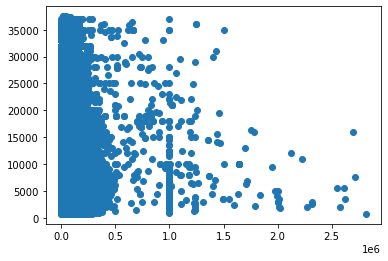

In [299]:
# plot price vs odometer of good condition
plt.scatter(temp, df[df['condition']=='good']['price'])
plt.show()

In [285]:
# Condition and Odometer

In [301]:
# drop rows where condition is good and odometer is less than 10
df.drop(df[(df['condition']=='good') & (df['odometer']<10)].index)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,others,33590,2014.0,gmc,others,good,8.0,gas,57923.0,clean,other,NaN,pickup,white,al
28,others,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,NaN,pickup,blue,al
30,others,30990,2017.0,toyota,others,good,8.0,gas,41124.0,clean,other,NaN,pickup,red,al
31,others,15000,2013.0,ford,others,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,black,al
32,others,27990,2012.0,gmc,others,good,8.0,gas,68696.0,clean,other,4wd,pickup,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,others,23590,2019.0,nissan,others,good,6.0,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,others,30590,2020.0,others,others,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,others,34990,2020.0,cadillac,others,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,others,28990,2018.0,lexus,others,good,6.0,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [317]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [318]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 63211.15
Excellent average odometer: 109543.23
Good average odometer: 95313.64
Fair average odometer: 210162.07
Salvage average odometer: 160785.51


`fill missing values with mean column values`

In [327]:
# for all null values in condition when age is less than 4, set condition to new
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [328]:
# like new
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

In [329]:
# fair condition
df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

In [335]:
df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [330]:
# excellent condition
df.loc[((df['odometer'] > good_odo_mean) &
         (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) &
            (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

In [336]:
df.condition.isnull().sum()

0

In [332]:
# fill remaining null values by these conditions:
# good condition for year between 2010 and 2018 and odometer between 111734.77 and 176653.53
df.loc[((df['year'] >= 2010) & (df['year'] <= 2018) &
        (df['odometer'] > 111734.77) & (df['odometer'] <= 176653.53)), 'condition'] = df.loc[((df['year'] >= 2010) & (df['year'] <= 2018) &
        (df['odometer'] > 111734.77) & (df['odometer'] <= 176653.53)), 'condition'].fillna('good')



In [333]:
# good condition
df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

In [339]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
drive,300,0.001
region,0,0.000
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
cylinders,0,0.000
fuel,0,0.000
odometer,0,0.000


In [321]:
# drop rows with less than 6% of null values
df = df.dropna(subset=['fuel','transmission','model','manufacturer', 'title_status'])

In [322]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')

In [340]:
# drive type
df['drive'] = df['drive'].fillna(method='ffill')

In [341]:
#cyliners
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [342]:
#type
df['type'] = df['type'].fillna(method='ffill')

In [345]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [344]:
# drop rows with null values
df = df.dropna(subset=['drive'])

In [346]:
df.to_csv('/Users/patrickokwir/Desktop/Capstone---Predicting-market-value-of-used-cars/Data/cleaned_cars.csv', index=False)